# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create an empty data frame to save the data
cities_pd = pd.DataFrame(columns = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])

In [4]:
print("Beginning Data Retrieval\n-----------------------------")
base_url = "https://api.openweathermap.org/data/2.5/find?units=imperial"
total_counts = len(cities)
for city in cities:
    address = city
    query_url = f"{base_url}&q={address}&appid={api_key}"
    try:
        response = requests.get(query_url).json()
        #proceed after 0.05 second
        time.sleep(0.05)
        #check if the city is in the database
        response["count"]==1
        #update the data frame with new row of data for each city
        cities_pd.loc[cities.index(city)] = [city,response["list"][0]["clouds"]["all"],response["list"][0]["sys"]["country"],response["list"][0]["dt"],response["list"][0]["main"]["humidity"],response["list"][0]["coord"]["lat"],response["list"][0]["coord"]["lon"],response["list"][0]["main"]["temp_max"],response["list"][0]["wind"]["speed"]]
        print(f"Processing Record {cities.index(city)+1} of {total_counts} | {city}")
        
    except:
        print("City not found. Skipping...")
        #total_cities = len(cities)-1 #update the total number of cities
        #del(cities[cities.index(city)]) #delete this unfound city from the cities list

print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 2 of 608 | colac
Processing Record 3 of 608 | cidreira
Processing Record 4 of 608 | khatanga
Processing Record 5 of 608 | arraial do cabo
Processing Record 6 of 608 | auki
Processing Record 7 of 608 | port lincoln
Processing Record 8 of 608 | manokwari
Processing Record 9 of 608 | kruisfontein
Processing Record 10 of 608 | busselton
Processing Record 11 of 608 | ushuaia
Processing Record 12 of 608 | lashio
Processing Record 13 of 608 | bredasdorp
Processing Record 14 of 608 | butaritari
Processing Record 15 of 608 | punta arenas
Processing Record 16 of 608 | hambantota
Processing Record 17 of 608 | mahibadhoo
Processing Record 18 of 608 | nikolskoye
Processing Record 19 of 608 | saint-philippe
Processing Record 20 of 608 | mataura
Processing Record 21 of 608 | georgetown
Processing Record 22 of 608 | nouakchott
Processing Record 23 of 608 | luderitz
Processing Record 24 of 608 | kochube

Processing Record 213 of 608 | camacha
Processing Record 214 of 608 | tabou
Processing Record 215 of 608 | edd
Processing Record 216 of 608 | alihe
Processing Record 217 of 608 | laguna
Processing Record 218 of 608 | owando
Processing Record 219 of 608 | ambon
Processing Record 220 of 608 | mehamn
Processing Record 221 of 608 | trinidad
Processing Record 222 of 608 | miandrivazo
City not found. Skipping...
Processing Record 224 of 608 | narsaq
Processing Record 225 of 608 | morondava
Processing Record 226 of 608 | mbanza-ngungu
Processing Record 227 of 608 | basco
Processing Record 228 of 608 | yar-sale
Processing Record 229 of 608 | omboue
City not found. Skipping...
Processing Record 231 of 608 | port-gentil
Processing Record 232 of 608 | la ronge
City not found. Skipping...
Processing Record 234 of 608 | goure
Processing Record 235 of 608 | chervone
Processing Record 236 of 608 | ulladulla
Processing Record 237 of 608 | rio esteban
Processing Record 238 of 608 | conway
Processing Re

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 426 of 608 | tecoanapa
Processing Record 427 of 608 | waterloo
City not found. Skipping...
Processing Record 429 of 608 | bay roberts
Processing Record 430 of 608 | leh
Processing Record 431 of 608 | george
Processing Record 432 of 608 | cooma
Processing Record 433 of 608 | yeppoon
Processing Record 434 of 608 | ucluelet
Processing Record 435 of 608 | saldanha
Processing Record 436 of 608 | tekirdag
Processing Record 437 of 608 | kamenka
Processing Record 438 of 608 | naze
Processing Record 439 of 608 | luganville
Processing Record 440 of 608 | portland
Processing Record 441 of 608 | hayden
Processing Record 442 of 608 | xai-xai
Processing Record 443 of 608 | suluq
Processing Record 444 of 608 | old town
Processing Record 445 of 608 | aseri
Processing Record 446 of 608 | laje
Processing Record 447 of 608 | ocotepec
Processing Record 448 of 608 | matveyev kurgan
Processing Record 449 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#reset the index
cities_pd.reset_index(inplace=True)
cities_pd.drop(columns="index",inplace=True)
#export the city data into a .csv
cities_pd.to_csv(output_data_file)

In [6]:
cities_pd.count()

City          541
Cloudiness    541
Country       541
Date          541
Humidity      541
Lat           541
Lng           541
Max Temp      541
Wind Speed    541
dtype: int64

In [7]:
cities_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,colac,100,AU,1572934463,68,-38.3400,143.5859,64.99,5.99
1,cidreira,100,BR,1572930694,93,-30.1658,-50.2184,70.94,9.78
2,khatanga,100,RU,1572934438,94,71.9801,102.4743,1.59,12.88
3,arraial do cabo,0,BR,1572930569,85,-22.9663,-42.0245,73.79,8.48
4,auki,0,NG,1572934485,30,12.1824,6.5056,73.43,5.23


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [8]:
#get the current date in mm/dd/yy format
date = datetime.date.today().strftime("%m/%d/%y")

#### Latitude vs. Temperature Plot

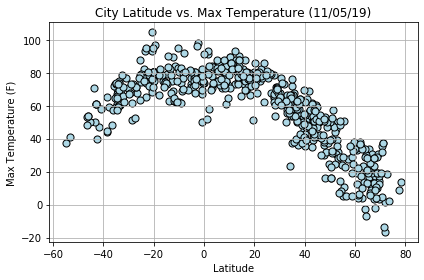

In [9]:
cities_pd["Max Temp"] = pd.to_numeric(cities_pd["Max Temp"],errors='coerce')
cities_pd.plot("Lat","Max Temp",kind="scatter",color = "lightblue", edgecolor = "black",s = 50)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.grid()
plt.tight_layout()
plt.show()

#### Latitude vs. Humidity Plot

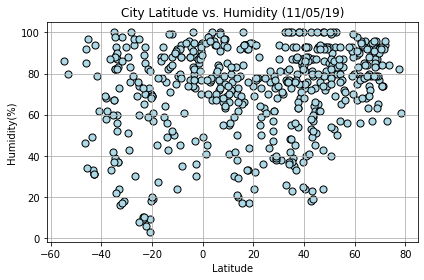

In [10]:
cities_pd["Humidity"] = pd.to_numeric(cities_pd["Humidity"],errors='coerce')
cities_pd.plot("Lat","Humidity",kind="scatter",color = "lightblue", edgecolor = "black",s = 50)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid()
plt.tight_layout()
plt.show()

#### Latitude vs. Cloudiness Plot

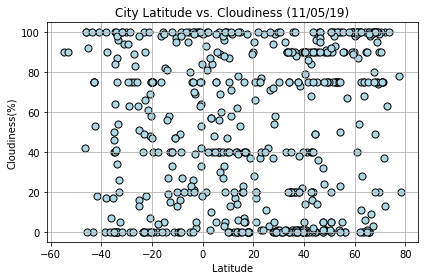

In [11]:
cities_pd["Cloudiness"] = pd.to_numeric(cities_pd["Cloudiness"],errors='coerce')
cities_pd.plot("Lat","Cloudiness",kind="scatter",color = "lightblue", edgecolor = "black",s = 50)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid()
plt.tight_layout()
plt.show()

#### Latitude vs. Wind Speed Plot

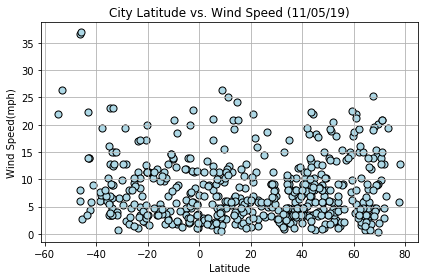

In [12]:
cities_pd["Wind Speed"] = pd.to_numeric(cities_pd["Wind Speed"],errors='coerce')
cities_pd.plot("Lat","Wind Speed",kind="scatter",color = "lightblue", edgecolor = "black",s = 50)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid()
plt.tight_layout()
plt.show()

# three observable trends based on the data# Three 

1. From the first scatter plot(i.e. Latitude vs Max Temperature), we can see that the temperature tends to increase with the latitude get close to 0, which respresents the equator. So yes, it gets hotter when we approach the equator.

2. We can not see much relationship between latitude and humidity, cloudiness or wind speed. basically the humidity, cloudiness and wind speed is a factor of how close the city is to the coastline and etc. From plot 2, 3, and 4, we can see they are almost evenly distributed.

3. Generally speaking, more than 50% of the cities have high humidity and relatively low wind speed. there are some outliner outliers wich may be caused by natural disasters such as typhoon and tornado that can heavily increase the wind speed, drought and desertization that can decrease the humidity. Cloudiness is evenly distributed across the entire range from 0 to 100%.